# Homework 7: Decision Tree
Isac do Nascimento Lira, 371890

1. Utilizamos a medida de Entropia como fator de decisão (medida de impureza de um nó). Teste o mesmo conjunto 
randômico de dados para a medida Gini e compare os resultados.

In [2]:
import os
import pandas as pd
import math
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
columns = ["buying", "maint", "doors", "persons","lug_boot", "safety"]
cardf = pd.read_csv("car_data.csv", names=columns)
cardf = cardf.sample(frac=1).reset_index(drop=True)
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 6 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
dtypes: object(6)
memory usage: 81.1+ KB


In [75]:
cardf.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,5more,more,big,low,unacc
1,med,5more,2,small,high,unacc
2,low,3,4,big,low,unacc
3,low,2,2,med,high,unacc
4,med,2,4,small,med,acc


In [55]:
# Transforma as features categóricas em numéricas

cat_features = ['buying','maint','doors','persons','lug_boot','safety']
for feature in cat_features:
    cardf[feature] = cardf[feature].astype('category').cat.codes
    

In [48]:
# Divide os dados em treino e teste

msk = np.random.rand(len(cardf))<0.7
ytrain = cardf['class'].iloc[msk]
xtrain = cardf[msk].drop(['class'],axis=1)

ytest = cardf['class'].iloc[~msk]
xtest = cardf[~msk].drop(['class'],axis=1)

### Prediction Model

In [88]:
# Classifica usando árvode de decisão com criério baseado em entropy/gini

dtree_entropy = DecisionTreeClassifier(criterion = 'entropy')
dtree_entropy.fit(xtrain,ytrain)
entropy_score = dtree_entropy.score(xtest,ytest)
print('Score using entropy criterion:',entropy_score)

dtree_gini = DecisionTreeClassifier(criterion = 'gini')
dtree_gini.fit(xtrain,ytrain)
gini_score = dtree.score(xtest,ytest)
print('Score using gini criterion:',gini_score)

Score using entropy criterion: 0.975925925926
Score using gini criterion: 0.975925925926


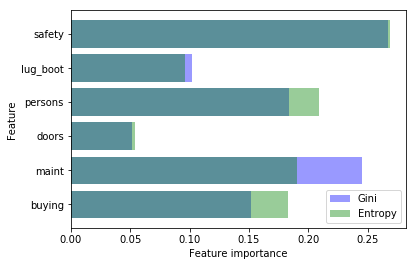

In [101]:
plt.barh(range(len(columns)),dtree_gini.feature_importances_,align='center',alpha=0.4,color='b',label='Gini')
plt.barh(range(len(columns)),dtree_entropy.feature_importances_,align='center',alpha=0.4,color='g',label='Entropy')
plt.yticks(range(len(columns)),cat_features)
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.legend(loc='best')
plt.show()

2- Faça o balanceamento dos dados contidos em "train.csv", aplique o algoritmo de Decision Tree e faça a submissão no kaggle. Tente melhorar o resultado obtido em sala de aula (posição 3100 no leaderboard).

In [118]:
# Carrega os dados
portodf = pd.read_csv('train/train.csv')
testsdf = pd.read_csv('test/test.csv')

In [7]:
# Visualizando os dados
portodf.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [12]:
portodf.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

Dados desbalanceados.

In [115]:
# Balanceando os dados
samples = 25000

unbalanced_idx = portodf[portodf.target==0].index
balanced_idx = portodf[portodf.target==1].index

selected_idx1 = set(np.random.choice(unbalanced_idx,samples))
selected_idx = selected_idx1.union(set(balanced_idx))
sampled_portodf = portodf.loc[selected_idx]
#sampled_portodf = pd.DataFrame(sampled_portodf.values,columns=sampled_portodf.columns)

In [108]:
# Dividindo em treino e teste
def split_train(data):    
    msk = np.random.rand(len(data))<0.7
    xtrain = data.drop(['target'],axis=1).iloc[msk]
    ytrain = data.target[msk]

    xtest = data.drop(['target'],axis=1).iloc[~msk]
    ytest = sampled_portodf.target[~msk]
    
    return xtrain,ytrain,xtest,ytest

In [109]:
# Instanciando uma árvore de decisão
from sklearn.metrics import classification_report

xtrain,ytrain,xtest,ytest = split_train(sampled_portodf)
dtree = DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)
predictions = dtree.predict(xtest)
print(classification_report(ytest,predictions))

             precision    recall  f1-score   support

          0       0.96      0.95      0.96    172026
          1       0.04      0.06      0.05      6680

avg / total       0.93      0.92      0.92    178706



In [113]:
xtrain,ytrain,xtest,ytest = split_train(sampled_portodf)
dtree = DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)
predictions = dtree.predict(xtest)
print(classification_report(ytest,predictions))

             precision    recall  f1-score   support

        0.0       0.56      0.55      0.55      7303
        1.0       0.50      0.51      0.50      6483

avg / total       0.53      0.53      0.53     13786



Apenas amostrando o dataset para torná-lo mais balanceado, nota-se uma melhora em ambas as métrica precision/recall.

In [125]:
predictions = dtree.predict(testsdf)
submission = pd.DataFrame()
submission['id'] = testsdf.iloc[:, 0]
submission['target'] = predictions


In [121]:
submission.to_csv('kaggle_submission.csv', index=False)

In [124]:
submission.target.value_counts()

0.0    489477
1.0    403339
Name: target, dtype: int64